## When a data with continuous variables or linear behaviour is either Underfitting or Overfitting the best fit line due to which accurate predictions are difficult to make, this situation is called regularization and to deal with such problems in linear model we use Lasso and Ridge regression.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\singhegm\Downloads\Melbourne.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.nunique()

Suburb             336
Address          23108
Rooms               11
Type                 3
Price             2470
Method               9
SellerG            330
Date                58
Distance           211
Postcode           206
Bedroom2            13
Bathroom            10
Car                 13
Landsize          1567
BuildingArea       688
YearBuilt          155
CouncilArea         34
Lattitude         8837
Longtitude        9584
Regionname           8
Propertycount      330
dtype: int64

In [4]:
df.shape

(23547, 21)

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
df.drop(['Address', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'YearBuilt'], axis = 1)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,Wyndham Vale,3,u,NaN,PN,Harcourts,27.2,3.0,1.0,0.0,552.0,119.0,NaN,Western Metropolitan,5262.0
23543,Wyndham Vale,4,h,NaN,S,hockingstuart,27.2,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5262.0
23544,Yallambie,4,h,1100000.0,S,Buckingham,12.7,4.0,3.0,2.0,NaN,NaN,NaN,Northern Metropolitan,1369.0
23545,Yarraville,4,h,1285000.0,SP,Village,6.3,4.0,1.0,1.0,362.0,112.0,NaN,Western Metropolitan,6543.0


In [7]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [8]:
df.dropna(inplace = True)
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [9]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,0,1,0,0,1,0,0,0,0,0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,0,1,0,0,1,0,0,0,0,0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,0,1,0,0,1,0,0,0,0,0


In [10]:
x = df.drop('Price', axis = 1)
y = df['Price']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [12]:
x_train.shape

(4337, 6709)

In [13]:
y_train.shape

(4337,)

In [14]:
# Linear Regression Model

from sklearn import linear_model
LR_model = linear_model.LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [15]:
LR_model.score(x_test, y_test)

0.69025286021336

In [16]:
LR_model.score(x_train, y_train)

1.0

### Note: - Training model is completely overfitting

### Now, we will train and test our model using L1 and L2 regularization methods.

In [17]:
# Lasso Regression Model

lasso = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [18]:
lasso.score(x_test, y_test)

0.6678685604025081

In [19]:
lasso.score(x_train, y_train)

0.9417034608566955

### A regression model that uses L1 regularization technique is called Lasso Regression which adds absolute value of magnitude as penalty to the loss function.

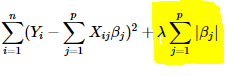

In [20]:
# Ridge Regression Model

ridge = linear_model.Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [21]:
ridge.score(x_test, y_test)

0.7208151413225115

In [22]:
ridge.score(x_train, y_train)

0.7063520974174231

### A model which uses L2 regularization is called Ridge Regression which adds squared magnitude as penalty to the loss function.

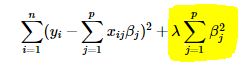